# Home Assignment 1

In [1]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt

## Problem 1 (1 point). My Hashrate

This is a simple implemetation of Proof-of-Work function.
It takes current block header and block calculation difficulty as inputs and returns nonce for this block and the header of a mined block.

In [2]:
import hashlib

def proof_of_work(header, target):
    max_nonce = 2 ** 32
    for nonce in range(max_nonce):
        hash_result = hashlib.sha256(str(header).encode('utf-8')+str(nonce).encode('utf-8')).hexdigest()

        if int(hash_result, 16) < target:
            return (hash_result, nonce)

The genesis block is calulated here.

In [3]:
import time

nonce = 0
block_hash = ""
new_block = 'This is the genesis block' + block_hash

difficulty_bits = 8
target = 2 ** (256-difficulty_bits)

start_time = time.time()
(block_hash, nonce) = proof_of_work(new_block, target)
end_time = time.time()
elapsed_time = end_time - start_time

print("Success with nonce ", nonce)
print("Hash is ", block_hash)
print("Elapsed time: %.4f seconds" % elapsed_time)

Success with nonce  186
Hash is  005eaab75f55d7cef91c03f04052043056113f6ee14abfcf4a0562a019aa1cbe
Elapsed time: 0.0014 seconds


### Task

Choose such a target that you will calculated 20 160 000 blocks per 14 days in avarage. Prove it experimetally (estimate time for at least 1000 blocks; compute both mean and standard deviation of a single block generation).

*Note.* Each next block should be calculated using the hash of the previous one.

In [4]:
total_blocks = 20160000
total_days = 14
blocks_per_day = total_blocks / total_days
seconds_per_day = 60 * 60 * 24

In [5]:
estimated_seconds_block = seconds_per_day / blocks_per_day

estimated_seconds_1000_blocks = 1000 * estimated_seconds_block
print(estimated_seconds_1000_blocks)

60.0


In [57]:
header = 'This is the genesis block' + block_hash

start_time = time.time()

for i in range(2 ** 24):
    hash_result = hashlib.sha256(str(header).encode('utf-8') + str(i).encode('utf-8')).hexdigest()

end_time = time.time()

elapsed_time = end_time - start_time

hashrate = 2 ** 24 / elapsed_time

In [58]:
print(f'{hashrate:.0f} hashes per second')

664281 hashes per second


In [61]:
difficulty_bits_min = 14
difficulty_bits_max = 17

for difficulty_bits in range(difficulty_bits_min, difficulty_bits_max + 1, 1):
    
    target = 2 ** (256 - difficulty_bits)
    
    print(f'difficulty_bits: {difficulty_bits})')
    
    new_block = 'This is the genesis block'

    start_time = time.time()

    for index in range(1000):
        (block_hash, nonce) = proof_of_work(new_block, target)
        new_block = block_hash + str(nonce)

    end_time = time.time()

    seconds_1000_blocks = end_time - start_time
    print(f'Time for 1000 blocks: {seconds_1000_blocks:.2f} seconds')

    if seconds_1000_blocks > estimated_seconds_1000_blocks:
        break
    else:
        continue
    break

difficulty_bits: 14)
Time for 1000 blocks: 26.03 seconds
difficulty_bits: 15)
Time for 1000 blocks: 58.27 seconds
difficulty_bits: 16)
Time for 1000 blocks: 108.84 seconds


In [7]:
difficulty_bits = 15
target = 2 ** (256 - difficulty_bits)

new_block = 'This is the genesis block'

times = []
start_all = time.time()

for index in range(1000):
    start_time = time.time()
    (block_hash, nonce) = proof_of_work(new_block, target)
    new_block = block_hash + str(nonce)
    end_time = time.time()
    times.append(end_time - start_time)

end_all = time.time()
seconds_1000_blocks = end_all - start_all
print(f'Time for 1000 blocks generation: {seconds_1000_blocks:.2f} seconds')
print(f'Estimated time for 20160000 blocks: {(seconds_1000_blocks * 20160) / (60 * 60 * 24):.0f} days')

mean = sum(times) / len(times)
std_dev = (sum((x - mean) ** 2 for x in times) / len(times)) ** 0.5
print(f'Mean time of a single block generation: {mean} seconds')
print(f'Standard deviation of a single block generation: {std_dev}')

Time for 1000 blocks generation: 56.72 seconds
Estimated time for 20160000 blocks: 13 days
Mean time of a single block generation: 0.05671718430519104 seconds
Standard deviation of a single block generation: 0.05804487331589807


## Problem 2 (3 + 3* points). Merkle tree

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [2]:
!pip install networkx

In [3]:
!pip install PyQt5

In [4]:
import matplotlib
import networkx as nx
#%matplotlib qt5
from networkx import balanced_tree, draw_networkx, draw

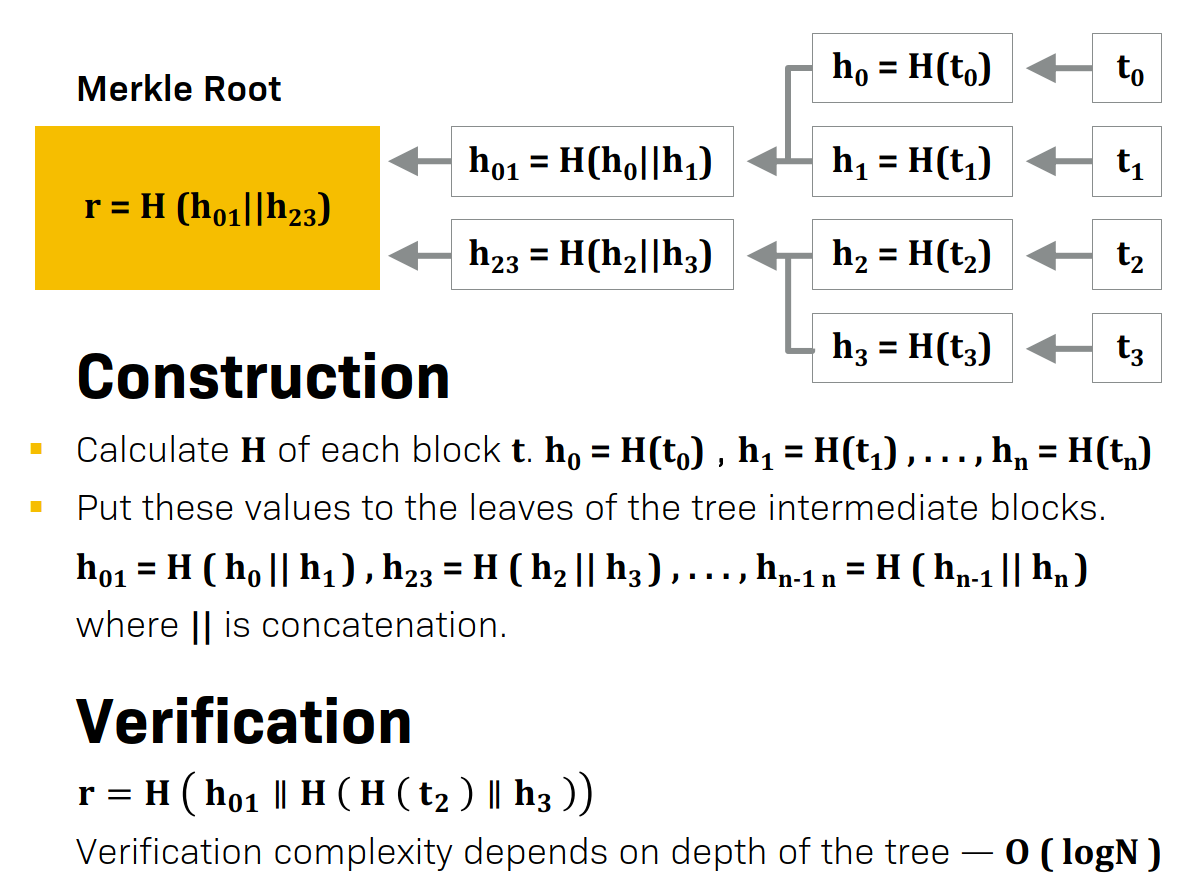

![problem2.png](attachment:problem2.png)

Let us plot graph basis for Merkle hash tree

{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '3'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

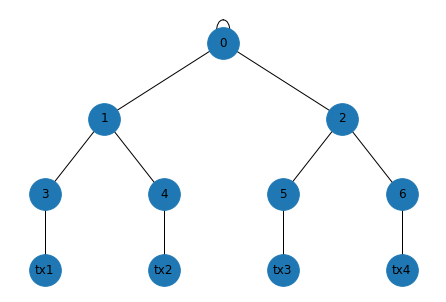

In [5]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [6]:
import hashlib


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

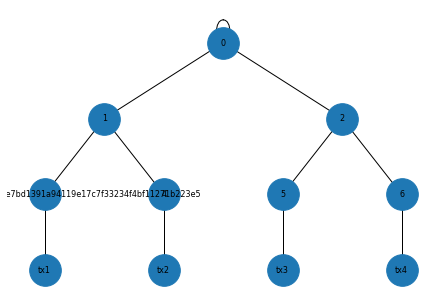

In [7]:
labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

1) Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices and plot obtained Merkle hash tree (1 point)

In [8]:
def merkle_tree_hash(data_input):
    return hashlib.sha256(hashlib.sha256(data_input.encode('utf-8')).digest()).hexdigest()

{0: Text(0, 4, '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 1: Text(-2, 3, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

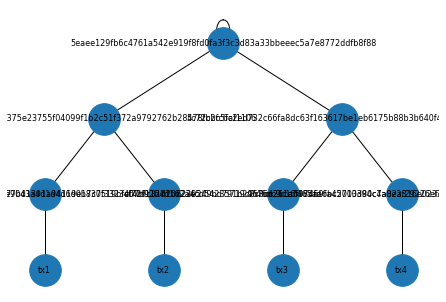

In [9]:
new_label_list = labels.copy()

for i in range(3, 6 + 1):
    new_label_list[i] = merkle_tree_hash(new_label_list[i + 4])

for i in range(1, 2 + 1):
    new_label_list[i] = merkle_tree_hash(new_label_list[2 * i + 1] + new_label_list[2 * i + 2])

new_label_list[0] = merkle_tree_hash(new_label_list[1] + new_label_list[2])

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = new_label_list, font_size = 8)

Let's draw it a little differently so that the hashes are better visible

{0: Text(0, 4, '5eaee129...'),
 1: Text(-2, 3, '41925fc3...'),
 2: Text(2, 3, '5c72c2fc...'),
 3: Text(-3, 2, '856a4921...'),
 4: Text(-1, 2, '79043a4d...'),
 5: Text(1, 2, 'ef729c31...'),
 6: Text(3, 2, '4746dc9c...'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

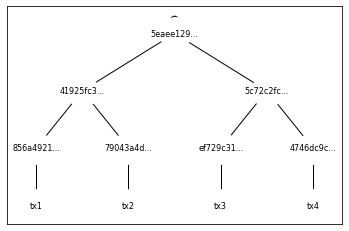

In [10]:
short_label_list = new_label_list.copy()
for i in range(7):
    short_label_list[i] = '{:.8}...'.format(short_label_list[i])

nx.draw_networkx(G, positions, node_size = 1000, node_color='w', alpha=1, with_labels=False)
nx.draw_networkx_labels(G, positions, labels = short_label_list, font_size = 8)

2) Provide a proof of correctness of leaf tx1 and set of leafs tx1-tx2 (1 point)

2.1: Proof of correctness of leaf tx1

In [11]:
leaf_tx1 = 'tx1'
hash_2 = new_label_list[4]
hash_34 = new_label_list[2] 

hash_1 = merkle_tree_hash(leaf_tx1)
hash_12 = merkle_tree_hash(hash_1 + hash_2)
hash_root = merkle_tree_hash(hash_12 + hash_34)

assert(hash_root == new_label_list[0])
print('Success!')

Success!


2.2: Proof of correctness of set of leafs tx1-tx2

In [12]:
leaf_tx1 = 'tx1'
leaf_tx2 = 'tx2'

hash_34 = new_label_list[2]

hash_1 = merkle_tree_hash(leaf_tx1)
hash_2 = merkle_tree_hash(leaf_tx2)
hash_12 = merkle_tree_hash(hash_1 + hash_2)
hash_root = merkle_tree_hash(hash_12 + hash_34)

assert(hash_root == new_label_list[0])
print('Success!')

Success!


3) Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (1 point)

In [13]:
incorrect_label_list = labels.copy()
incorrect_label_list[7] = 'something'

{0: Text(0, 4, '3b83f80700316eeeac0587e3e218249a654976bde585d34bf970cce0a2d2683b'),
 1: Text(-2, 3, '10cd0a34f470cc6e7040903fc0a712aaa8ecae9cc9cb02abbe24f432a7a527ca'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, '019fb066085bea5236e22c837c748607c95a050d8c36410da1e7a5ca24f67e16'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'something'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

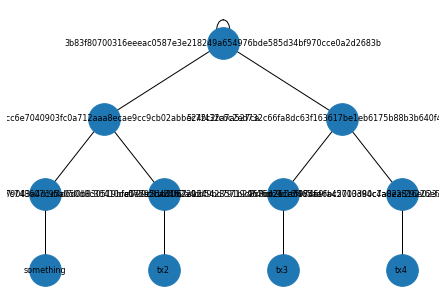

In [14]:
for i in range(3, 6 + 1):
    incorrect_label_list[i] = merkle_tree_hash(incorrect_label_list[i + 4])

for i in range(1, 2 + 1):
    incorrect_label_list[i] = merkle_tree_hash(incorrect_label_list[2 * i + 1] + incorrect_label_list[2 * i + 2])

incorrect_label_list[0] = merkle_tree_hash(incorrect_label_list[1] + incorrect_label_list[2])

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = incorrect_label_list, font_size = 8)

{0: Text(0, 4, '3b83f807...'),
 1: Text(-2, 3, '10cd0a34...'),
 2: Text(2, 3, '5c72c2fc...'),
 3: Text(-3, 2, '019fb066...'),
 4: Text(-1, 2, '79043a4d...'),
 5: Text(1, 2, 'ef729c31...'),
 6: Text(3, 2, '4746dc9c...'),
 7: Text(-3, 1, 'something'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

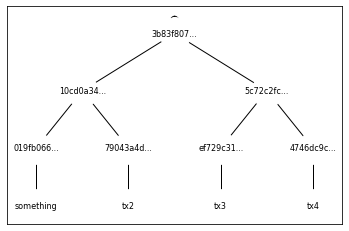

In [15]:
short_incorrect_label_list = incorrect_label_list.copy()
for i in range(7):
    short_incorrect_label_list[i] = '{:.8}...'.format(short_incorrect_label_list[i])

nx.draw_networkx(G, positions, node_size = 1000, node_color='w', alpha=1, with_labels=False)
nx.draw_networkx_labels(G, positions, labels = short_incorrect_label_list, font_size = 8)

4*) Implement a function to support the number of leafs $n =5, .., 16$. Let the value in the leaf $i$ be $txi$. Plot the tree. Provide the proof of correctness of leaf tx4 and set of leafs tx4-tx5 (3 bonus points)

4.1: Function to support the number of leafs 𝑛 = 5, ..., 16.

Let's prepare auxiliary functions

In [16]:
def get_merkle_tree(leaf_nodes):
    num_leaves = len(leaf_nodes)
    tree = []
    tree.append(leaf_nodes.copy()) # First level contains the leaf indices
    
    level_0 = []
    for j in range(num_leaves):
        level_0.append(merkle_tree_hash(leaf_nodes[j]))
    tree.append(level_0)

    for _ in range(int(math.log2(num_leaves))):
        level = []
        for i in range(0, len(tree[-1]), 2):
            concatenated_hash = tree[-1][i] + tree[-1][i+1]
            parent_hash = merkle_tree_hash(concatenated_hash)
            level.append(parent_hash)
        tree.append(level)

    return tree

In [17]:
def constract_merkle_tree(n):
    leaf_nodes = []
    for i in range(16):
        leaf_nodes.append(f'tx{i + 1}')
    
    if n <= 8:
        depth = int(math.log2(8)) # 4
        for i in range(n, 8):
            leaf_nodes[i] = leaf_nodes[i - 1]

        merkle_tree = get_merkle_tree(leaf_nodes[:8])
        parents = [0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    else:
        depth = int(math.log2(16)) # 4
        for i in range(n, 16):
            leaf_nodes[i] = leaf_nodes[i - 1]
        merkle_tree = get_merkle_tree(leaf_nodes)
        parents = [0, 
                   0, 0, 
                   1, 1, 2, 2, 
                   3, 3, 4, 4, 5, 5, 6, 6, 
                   7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14,
                   15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
        
    for level in range(len(merkle_tree) - 1, -1, -1):
        for item in merkle_tree[level]:
            print(item)
        print()
    return merkle_tree, parents, depth

Let's conduct two experiments: for n = 6 and n = 13

In [18]:
n = 6
merkle_tree_6, parents_6, depth_6 = constract_merkle_tree(n)

70ef76c8d482082666c67a74fb809aaf013d632fadbfafadb4e0a7db514574f1

5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88
bfb5b3c9df35e65fc42060067859ba54cea57f266b663f795f7b40d3a09742a2

41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106
5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73
d6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f
936e875379d6249e2eeb9c0dfcadeeb6210c84fed8d259cc9d4fafc5d7feabe0

856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5
79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd
ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233
4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e
929e74a52e6f0d8390d60d631d6dc8fb6cde5f10c04c7053bc94ce3f62759823
ccd702558bb588ba5d49d2ec85af0453fae434476f205ad6caa93da525f86627
ccd702558bb588ba5d49d2ec85af0453fae434476f205ad6caa93da525f86627
ccd702558bb588ba5d49d2ec85af0453fae434476f205ad6caa93da525f86627

tx1
tx2
tx3
tx4
tx5
t

In [19]:
n = 13
merkle_tree_13, parents_13, depth_13 = constract_merkle_tree(n)

ba0a9eecb0392d6e01febbb7b8940775320c9798732af2158b64d744fedcd2e5

7ed0ef1f4a0f7e02413d0f19708f9bde561158a5edd44315ea84e0f18ad7bce3
3f1b0b66978bb42cc238ced517ad7e05d17b8a4dd55068a836cc7331a0e345d4

5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88
d39c3a46d7a6dfcf4442264d564bd484d32bc7d4cf4557d66cf23564c20d90e9
d3b59afdc93322a050a95b5dfc27451573923ca5484a6da7c976981098d0fb3d
5351555413dee5f72408b96c5917347b4b8c3b0b64eb60bee5de6598d48663e2

41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106
5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73
d6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f
ea7690966598257569c816a598a57638cfd7b0b1e43b1bf5d0a62f4de981a7e8
6bb20dd0d630085f7cce8f0c3b4517bd4c9ded476a77759fb0a93f74c017bdb5
b7aa6f0c7ebb7fd834860360b1bb23181e8a05336dee67812a40d175dc34da8e
32670228702ac606420965809dc9adb9aa1b6ea85f794ca74b77a68a47615c13
32670228702ac606420965809dc9adb9aa1b6ea85f794ca74b77a68a47615c13

856a4921cd32690244af7

4.2: Plot the tree

In [20]:
def get_label_list(merkle_tree):
    label_list = {}
    index = 0

    for level in range(len(merkle_tree) - 1, -1, -1):
        for item in merkle_tree[level]:
            label_list[index] = item
            index += 1
    return label_list

In [21]:
def get_positions(depth):
    coordinates = []

    level_coord = [None] * (2 ** (depth))
    idx = 0
    left_start = - 2 ** (depth - 0)
    for i in range(left_start, 0, 2):
        level_coord[idx] = [i, 0]
        level_coord[-idx - 1] = [-i, 0]
        idx += 1
    coordinates.append(level_coord)

    for level in range(depth):
        level_coord = [None] * (2 ** (depth - level))
        left_start = - 2 ** (depth - level)

        idx = 0
        for i in range(left_start, 0, 2):
            level_coord[idx] = [i, level + 1]
            level_coord[-idx - 1] = [-i, level + 1]
            idx += 1
        coordinates.append(level_coord)

    coordinates.append([[0, depth + 1]])
    index = 0
    positions = {}

    for level in range(len(coordinates) - 1, -1, -1):
        for item in coordinates[level]:
            positions[index] = item
            index += 1
    return positions

In [22]:
def plot_merkle_tree(parents, label_list, positions, depth):
    G = nx.Graph()

    for index in range(len(label_list)):
        G.add_node(index)
        G.add_edge(index, parents[index])
        
    short_label_list = label_list.copy()
    for i in range(len(label_list) - 2 ** depth):
        short_label_list[i] = '{:.3}...'.format(short_label_list[i])

    nx.draw_networkx(G, positions, node_size = 1000, node_color='w', alpha=1, with_labels=False)
    nx.draw_networkx_labels(G, positions, labels = short_label_list, font_size = 8)   

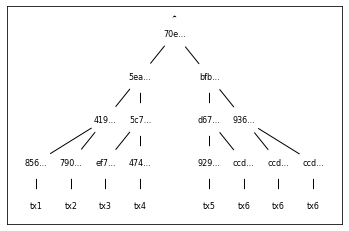

In [23]:
label_list_6 = get_label_list(merkle_tree_6)
positions_6 = get_positions(depth_6)

plot_merkle_tree(parents_6, label_list_6, positions_6, depth_6)

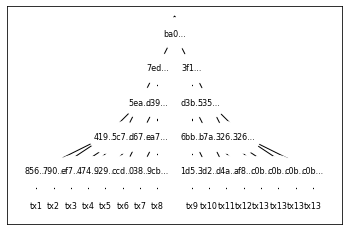

In [24]:
label_list_13 = get_label_list(merkle_tree_13)
positions_13 = get_positions(depth_13)

plot_merkle_tree(parents_13, label_list_13, positions_13, depth_13)

In [25]:
label_list_13

{0: 'ba0a9eecb0392d6e01febbb7b8940775320c9798732af2158b64d744fedcd2e5',
 1: '7ed0ef1f4a0f7e02413d0f19708f9bde561158a5edd44315ea84e0f18ad7bce3',
 2: '3f1b0b66978bb42cc238ced517ad7e05d17b8a4dd55068a836cc7331a0e345d4',
 3: '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88',
 4: 'd39c3a46d7a6dfcf4442264d564bd484d32bc7d4cf4557d66cf23564c20d90e9',
 5: 'd3b59afdc93322a050a95b5dfc27451573923ca5484a6da7c976981098d0fb3d',
 6: '5351555413dee5f72408b96c5917347b4b8c3b0b64eb60bee5de6598d48663e2',
 7: '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106',
 8: '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73',
 9: 'd6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f',
 10: 'ea7690966598257569c816a598a57638cfd7b0b1e43b1bf5d0a62f4de981a7e8',
 11: '6bb20dd0d630085f7cce8f0c3b4517bd4c9ded476a77759fb0a93f74c017bdb5',
 12: 'b7aa6f0c7ebb7fd834860360b1bb23181e8a05336dee67812a40d175dc34da8e',
 13: '32670228702ac606420965809dc9adb9aa1b6ea85f794ca74b77a68

4.3: Proof of correctness of leaf tx4

In [26]:
leaf_tx4 = 'tx4'

hash_3 = label_list_13[17]
hash_12 = label_list_13[7]
hash_5_8 = label_list_13[4]
hash_9_16 = label_list_13[2]

hash_4 = merkle_tree_hash(leaf_tx4)
hash_34 = merkle_tree_hash(hash_3 + hash_4)
hash_1_4 = merkle_tree_hash(hash_12 + hash_34)
hash_1_8 = merkle_tree_hash(hash_1_4 + hash_5_8)
hash_root = merkle_tree_hash(hash_1_8 + hash_9_16)

assert(hash_root == label_list_13[0])
print('Success!')

Success!


4.4: Proof of correctness of set of leafs tx4-tx5

In [27]:
leaf_tx4 = 'tx4'
leaf_tx5 = 'tx5'

hash_3 = label_list_13[17]
hash_6 = label_list_13[20]

hash_12 = label_list_13[7]
hash_78 = label_list_13[10]

hash_9_16 = label_list_13[2]

hash_4 = merkle_tree_hash(leaf_tx4)
hash_5 = merkle_tree_hash(leaf_tx5)

hash_34 = merkle_tree_hash(hash_3 + hash_4)
hash_56 = merkle_tree_hash(hash_5 + hash_6)

hash_1_4 = merkle_tree_hash(hash_12 + hash_34)
hash_5_8 = merkle_tree_hash(hash_56 + hash_78)

hash_1_8 = merkle_tree_hash(hash_1_4 + hash_5_8)

hash_root = merkle_tree_hash(hash_1_8 + hash_9_16)

assert(hash_root == label_list_13[0])
print('Success!')

Success!


## Problem 3 (6 + 2* points). Fork rate and main chain

Two miners are the only maintainers of the network. Each miner needs a random time to generate a new block which is modeled as exponential random variables with the rates $1/t_1$ and $1/t_2$ correspondingly. I.e. each miner generates Poisson point process of new blocks. The network is not ideal and it takes a random time to synchronize the block. The synchronization is modeled as an exponential random variable with the rate $1/t_0$. We assume both miners be honest and continue the longest known chain.

*Note.* The Poisson point process has memoryless and superposition properties [1]. So we can model three Poisson point processes independently and omit synchronization events if already synced.

![problem3.png](attachment:problem3.png)

\[1\] Daley, Daryl J.; Vere-Jones, David (2003). An Introduction to the Theory of Point Processes: Volume I: Elementary Theory and Methods. Springer. ISBN 978-1475781090.

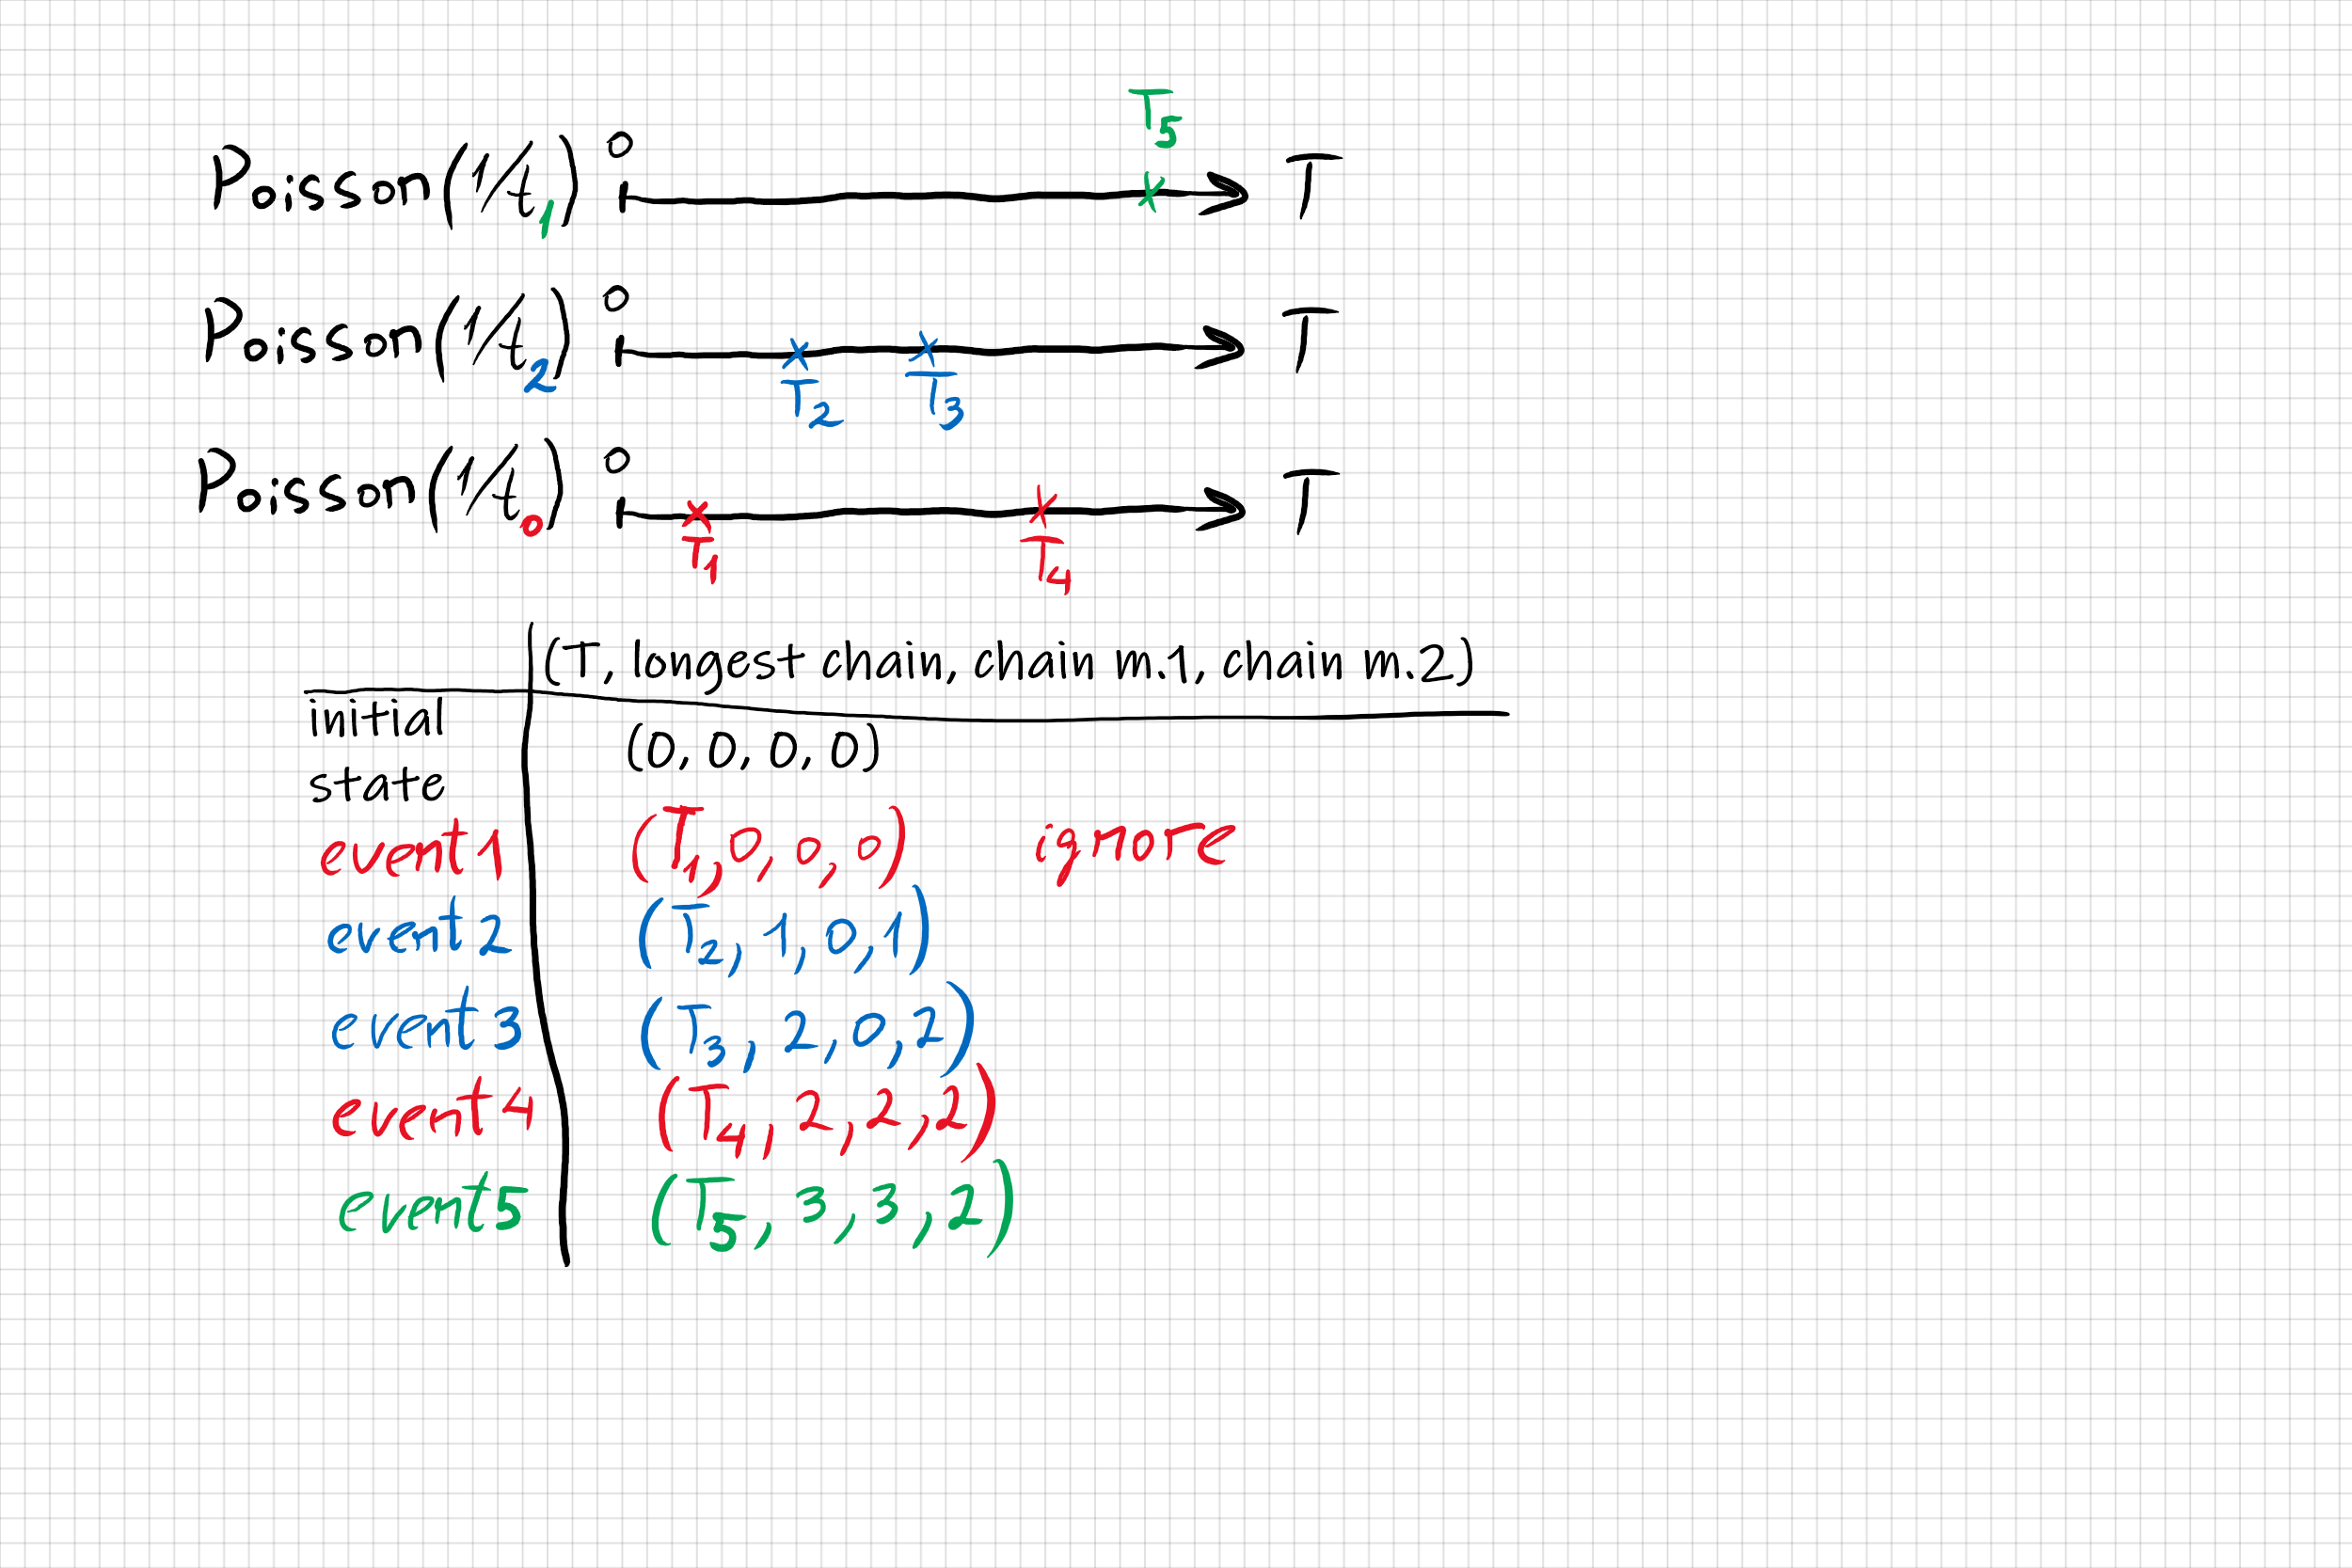

1) Implement a function to generate a sequence of tuples (time, longest chain, longest chain for miner 1, longest chain for miner 2) and run it for $t_1=t_2=1, t_0=0.5$ (1 point)

I made a chain of arrays, since it's easier to do the second task this way. I hope it was not a matter of principle to generate tuples here

In [34]:
def generate_chain(t1, t2, t0, time_interval_to_simulate):
    # miner 1
    number_of_blocks_miner_1 = scipy.stats.poisson(time_interval_to_simulate * (1 / t1)).rvs()
    event_times_miner_1 = sorted(scipy.stats.uniform.rvs(loc=0,
                                                          scale = time_interval_to_simulate,
                                                          size = number_of_blocks_miner_1))
    #print(event_times_miner_1)
    
    # miner 2
    number_of_blocks_miner_2 = scipy.stats.poisson(time_interval_to_simulate * (1 / t2)).rvs()
    event_times_miner_2 = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                         scale = time_interval_to_simulate,
                                                         size = number_of_blocks_miner_2))
    #print(event_times_miner_2)
    
    # synchronizations
    number_of_synchronizations = scipy.stats.poisson(time_interval_to_simulate * (1 / t0)).rvs()
    event_times_synchronizations = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                                  scale = time_interval_to_simulate,
                                                                  size = number_of_synchronizations))
    #print(event_times_synchronizations)
    
    total_event_times = np.concatenate((event_times_miner_1, event_times_miner_2, event_times_synchronizations))
    total_event_times = sorted(total_event_times)
    
    longest_chain = 0
    longest_chain_miner_1 = 0
    longest_chain_miner_2 = 0
    chain = 0
    chain_sequence = []
    
    index = 0
    total_blocks = 0
    for event_time in total_event_times:
        if event_time in event_times_miner_1:
            chain += 1
            total_blocks += 1
            longest_chain_miner_1 = max(longest_chain_miner_1, chain)
        elif event_time in event_times_miner_2:
            chain += 1
            total_blocks += 1
            longest_chain_miner_2 = max(longest_chain_miner_2, chain)
        elif event_time in event_times_synchronizations:
            chain = max(longest_chain_miner_1, longest_chain_miner_2)
            longest_chain = max(longest_chain, chain)
            
        chain_sequence.append([index, event_time, longest_chain, longest_chain_miner_1, longest_chain_miner_2])
        index += 1

    return chain_sequence, total_blocks

time_interval_to_simulate = 10.
t1 = 1.
t2 = 1.
t0 = 0.5

chain_sequence, total_blocks = generate_chain(t1, t2, t0, time_interval_to_simulate)
for event in chain_sequence:
    print(f'№{event[0]}.\t Time: {event[1]:.3f}, \t Longest chain: {event[2]}, \t for miner 1: {event[3]}, \t for miner 2: {event[4]}')

№0.	 Time: 0.007, 	 Longest chain: 0, 	 for miner 1: 1, 	 for miner 2: 0
№1.	 Time: 0.281, 	 Longest chain: 0, 	 for miner 1: 1, 	 for miner 2: 2
№2.	 Time: 0.480, 	 Longest chain: 0, 	 for miner 1: 1, 	 for miner 2: 3
№3.	 Time: 0.492, 	 Longest chain: 0, 	 for miner 1: 4, 	 for miner 2: 3
№4.	 Time: 0.920, 	 Longest chain: 0, 	 for miner 1: 4, 	 for miner 2: 5
№5.	 Time: 1.105, 	 Longest chain: 0, 	 for miner 1: 4, 	 for miner 2: 6
№6.	 Time: 1.538, 	 Longest chain: 6, 	 for miner 1: 4, 	 for miner 2: 6
№7.	 Time: 2.383, 	 Longest chain: 6, 	 for miner 1: 4, 	 for miner 2: 6
№8.	 Time: 2.436, 	 Longest chain: 6, 	 for miner 1: 4, 	 for miner 2: 6
№9.	 Time: 2.511, 	 Longest chain: 6, 	 for miner 1: 4, 	 for miner 2: 6
№10.	 Time: 2.658, 	 Longest chain: 6, 	 for miner 1: 4, 	 for miner 2: 7
№11.	 Time: 2.762, 	 Longest chain: 6, 	 for miner 1: 8, 	 for miner 2: 7
№12.	 Time: 2.963, 	 Longest chain: 8, 	 for miner 1: 8, 	 for miner 2: 7
№13.	 Time: 3.048, 	 Longest chain: 8, 	 for min

2) Plot the ratio of the blocks in the main chain to the number of generated blocks as a function of $t_0 \in (0, 2]$ for fixed $t_1=t_2=1$ (2 points)

In [35]:
def plot_ratio(t1, t2, time_interval_to_simulate):
    ratios = []
    t0_values = np.linspace(0.01, 2, num = 200)
    
    for t0 in t0_values:
        chain_sequence, total_blocks = generate_chain(t1, t2, t0, time_interval_to_simulate)
        
        main_chain_length = chain_sequence[-1][2]
        
        ratio = main_chain_length / total_blocks
        ratios.append(ratio)
    
    plt.figure(figsize=(10, 5))
    plt.plot(t0_values, ratios)
    plt.xlabel('t0', loc='right')
    plt.ylabel('Ratio', loc='top')
    plt.title(f'The ratio of the blocks in the main chain to the number of generated blocks as a function of t_0 ∈ (0,2]')
    plt.show()

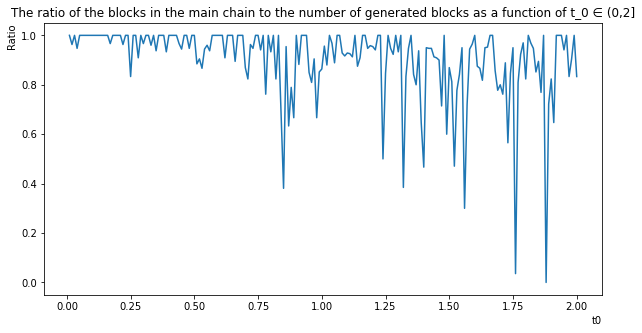

In [36]:
plot_ratio(t1, t2, time_interval_to_simulate)

3) Let there be an adversary miner 3 with a rate $t_3 = 0.9$ and instant communication with miners 1 and 2. Let him mine his own branch. Plot the empirical probability to go $6$ blocks ahead of the miners' 1 and 2 main chain during $T=100$ as a function of $t_0$ for fixed $t_1=t_2=1$ (3 points)

In [8]:
t1 = 1
t2 = 1
t3 = 0.9
T = 100

t0_values = np.linspace(0.1, 2, 100)

In [9]:
def generate_chain(t1, t2, t3, t0, time_interval_to_simulate):
    # miner 1
    number_of_blocks_miner_1 = scipy.stats.poisson(time_interval_to_simulate * (1 / t1)).rvs()
    event_times_miner_1 = sorted(scipy.stats.uniform.rvs(loc=0,
                                                          scale = time_interval_to_simulate,
                                                          size = number_of_blocks_miner_1))
    #print(event_times_miner_1)

    # miner 2
    number_of_blocks_miner_2 = scipy.stats.poisson(time_interval_to_simulate * (1 / t2)).rvs()
    event_times_miner_2 = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                         scale = time_interval_to_simulate,
                                                         size = number_of_blocks_miner_2))
    #print(event_times_miner_2)
        
    # miner 3
    number_of_blocks_miner_3 = scipy.stats.poisson(time_interval_to_simulate * (1 / t3)).rvs()
    event_times_miner_3 = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                         scale = time_interval_to_simulate,
                                                         size = number_of_blocks_miner_3))
    #print(event_times_miner_3)
    
    # synchronizations
    number_of_synchronizations = scipy.stats.poisson(time_interval_to_simulate * (1 / t0)).rvs()
    event_times_synchronizations = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                                  scale = time_interval_to_simulate,
                                                                  size = number_of_synchronizations))
    #print(event_times_synchronizations)
    
    total_event_times = np.concatenate((event_times_miner_1, event_times_miner_2, 
                                        event_times_miner_3, event_times_synchronizations))
    total_event_times = sorted(total_event_times)
    
    longest_chain = 0
    longest_chain_miner_1 = 0
    longest_chain_miner_2 = 0
    longest_chain_miner_3 = 0
    chain = 0
    chain_sequence = []
    index = 0

    for event_time in total_event_times:
        if event_time in event_times_miner_1:
            chain += 1
            longest_chain_miner_1 = max(longest_chain_miner_1, chain)
        elif event_time in event_times_miner_2:
            chain += 1
            longest_chain_miner_2 = max(longest_chain_miner_2, chain)
        elif event_time in event_times_miner_3:
            chain += 1
            longest_chain_miner_3 = max(longest_chain_miner_3, chain)
        elif event_time in event_times_synchronizations:
            chain = max(longest_chain_miner_1, longest_chain_miner_2, longest_chain_miner_3)
            longest_chain = max(longest_chain, chain)
        chain_sequence.append([index, event_time, longest_chain, longest_chain_miner_1, 
                               longest_chain_miner_2, longest_chain_miner_3])
        index += 1
    
    if longest_chain_miner_3 - longest_chain >= 6:
        return 1
    else:
        return 0

In [12]:
def calculate_probabilities(t1, t2, t3, t0_values, T):
    probabilities = []
    for t0 in t0_values:
        num_simulations = 100
        num_success = 0
        for _ in range(num_simulations):
            result = generate_chain(t1, t2, t3, t0, T)
            num_success += result

        probabilities.append(num_success / num_simulations)
    
    return probabilities

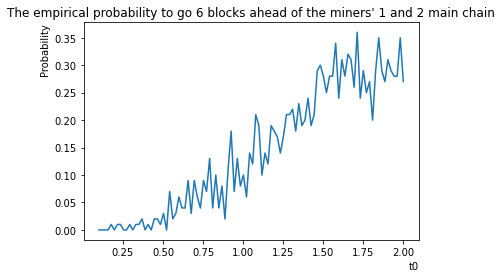

In [13]:
probabilities = calculate_probabilities(t1, t2, t3, t0_values, T)

plt.plot(t0_values, probabilities)
plt.xlabel('t0', loc='right')
plt.ylabel('Probability', loc='top')
plt.title('The empirical probability to go 6 blocks ahead of the miners\' 1 and 2 main chain')
plt.show()

4*) Demonstrate 51% attack by miner 3 (2 bonus points)

In [17]:
def generate_chain(t1, t2, t0, t3, time_interval_to_simulate):
    # miner 1
    number_of_blocks_miner_1 = scipy.stats.poisson(time_interval_to_simulate * (1 / t1)).rvs()
    event_times_miner_1 = sorted(scipy.stats.uniform.rvs(loc=0,
                                                          scale = time_interval_to_simulate,
                                                          size = number_of_blocks_miner_1))
    
    # miner 2
    number_of_blocks_miner_2 = scipy.stats.poisson(time_interval_to_simulate * (1 / t2)).rvs()
    event_times_miner_2 = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                         scale = time_interval_to_simulate,
                                                         size = number_of_blocks_miner_2))
    
    # miner 3
    number_of_blocks_miner_3 = scipy.stats.poisson(time_interval_to_simulate * (1 / t3)).rvs()
    event_times_miner_3 = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                         scale = time_interval_to_simulate,
                                                         size = number_of_blocks_miner_3))
    
    # synchronizations
    number_of_synchronizations = scipy.stats.poisson(time_interval_to_simulate * (1 / t0)).rvs()
    event_times_synchronizations = sorted(scipy.stats.uniform.rvs(loc = 0,
                                                                  scale = time_interval_to_simulate,
                                                                  size = number_of_synchronizations))
    
    total_event_times = np.concatenate((event_times_miner_1, event_times_miner_2, 
                                        event_times_miner_3, event_times_synchronizations))
    total_event_times = sorted(total_event_times)
    
    longest_chain = 0
    longest_chain_miner_1 = 0
    longest_chain_miner_2 = 0
    longest_chain_miner_3 = 0
    chain = 0
    chain_sequence = []
    
    index = 0
    total_blocks = 0
    for event_time in total_event_times:
        if event_time in event_times_miner_1:
            chain += 1
            total_blocks += 1
            longest_chain_miner_1 = max(longest_chain_miner_1, chain)
        elif event_time in event_times_miner_2:
            chain += 1
            total_blocks += 1
            longest_chain_miner_2 = max(longest_chain_miner_2, chain)
        elif event_time in event_times_miner_3:
            chain += 1
            total_blocks += 1
            longest_chain_miner_3 = max(longest_chain_miner_3, chain)
        elif event_time in event_times_synchronizations:
            chain = max(longest_chain_miner_1, longest_chain_miner_2, longest_chain_miner_3)
            longest_chain = max(longest_chain, chain)
            
        chain_sequence.append([index, event_time, longest_chain, longest_chain_miner_1, longest_chain_miner_2, longest_chain_miner_3])
        index += 1
        if longest_chain_miner_3 - longest_chain >= 6:
            break

    return chain_sequence, total_blocks

t0 = 2
chain_sequence, total_blocks = generate_chain(t1, t2, t0, t3, T)
for event in chain_sequence:
    print(f'№{event[0]}.\t Time: {event[1]:.3f}, \t Longest chain: {event[2]}, \t for miner 3: {event[5]}')

№0.	 Time: 0.191, 	 Longest chain: 0, 	 for miner 3: 0
№1.	 Time: 0.236, 	 Longest chain: 0, 	 for miner 3: 2
№2.	 Time: 0.369, 	 Longest chain: 0, 	 for miner 3: 2
№3.	 Time: 0.756, 	 Longest chain: 0, 	 for miner 3: 4
№4.	 Time: 0.977, 	 Longest chain: 0, 	 for miner 3: 4
№5.	 Time: 0.982, 	 Longest chain: 5, 	 for miner 3: 4
№6.	 Time: 1.733, 	 Longest chain: 5, 	 for miner 3: 4
№7.	 Time: 2.787, 	 Longest chain: 5, 	 for miner 3: 7
№8.	 Time: 2.947, 	 Longest chain: 7, 	 for miner 3: 7
№9.	 Time: 3.393, 	 Longest chain: 7, 	 for miner 3: 8
№10.	 Time: 3.437, 	 Longest chain: 7, 	 for miner 3: 9
№11.	 Time: 3.527, 	 Longest chain: 7, 	 for miner 3: 9
№12.	 Time: 3.796, 	 Longest chain: 7, 	 for miner 3: 11
№13.	 Time: 3.816, 	 Longest chain: 7, 	 for miner 3: 11
№14.	 Time: 3.823, 	 Longest chain: 7, 	 for miner 3: 11
№15.	 Time: 4.135, 	 Longest chain: 7, 	 for miner 3: 11
№16.	 Time: 4.304, 	 Longest chain: 7, 	 for miner 3: 15
